## Tips from Police Activity dataset

textbook from [course](https://www.datacamp.com/courses/analyzing-police-activity-with-pandas)

In [ ]:
# combine separate columns DATE and TIME into one
datetime = df.col_date.str.cat(ri.col_time, sep=' ')
df['col_datetime'] = pd.to_datetime(datetime)

In [ ]:
# % of unique values in a column
df.col_a.value_counts(normalize=True)

F_speeding = df[(df.gender == 'F') & (df.violation == 'Speeding')]
print(F_speeding.outcome.value_counts(normalize=True))

In [ ]:
# % of TRUE in a bool col_b (group by col_a) [np]
df.groupby('col_a').col_b.mean()

In [ ]:
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)
print(df.frisk.sum())

searched = df[df.search_conducted == True]
print(searched.groupby('driver_gender').frisk.mean())

In [ ]:
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()
hourly_arrest_rate.plot()

# or

hourly_arrest_rate = df.resample('H').is_arrested.mean()
hourly_arrest_rate.plot()

In [ ]:
print(ri.stop_duration.unique())
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')
plt.show()

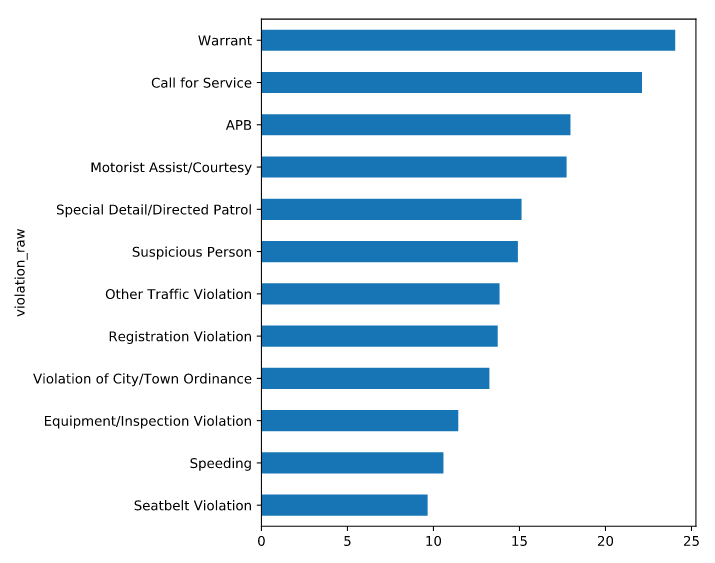

In [ ]:
mapping = {'0-15 Min': 'short', '16-30 Min': 'medium', '30+ Min': 'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
cats = ['short', 'medium', 'long']
ri['stop_length'] = ri.stop_length.astype('category', ordered=True, 
                                          categories=cat)